In [2]:
from hdfs import InsecureClient
import pandas as pd
import io
client = InsecureClient('http://localhost:9870', user='your_user')
with client.read('/user/your_user/youtube_data/topSubscribed.csv') as reader:
    df = pd.read_csv(io.BytesIO(reader.read()))

print(df.head())

   Rank             Youtube Channel  Subscribers      Video Views Video Count  \
0     1                    T-Series  234,000,000  212,900,271,553      18,515   
1     2              YouTube Movies  161,000,000                0           0   
2     3  Cocomelon - Nursery Rhymes  152,000,000  149,084,178,448         846   
3     4                   SET India  150,000,000  137,828,094,104     103,200   
4     5                     MrBeast  128,000,000   21,549,128,785         733   

           Category  Started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
4     Entertainment     2012  


In [2]:
#Removing outliers 
df = df.dropna().replace("https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels", "Misc")
df = df.dropna().replace(1970, "2005")
#Removing the commas in each string
for col in ["Subscribers", "Video Views", "Video Count"]:
  df[col] = df[col].str.replace(",", "")

#Casting video count to int and dividing by 1000
for col in ["Video Count"]: 
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000

#Casting each element to integer then dividing by a million when needed
for col in ["Subscribers", "Video Views"]: 
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000000

#Casting each element to integer
for col in ["Rank","Started"]: 
  df[col] = df[col].astype(int)

#Creating Age Column
df['Age'] = 2023 - df['Started']

print(df)

     Rank             Youtube Channel  Subscribers    Video Views  \
0       1                    T-Series        234.0  212900.271553   
1       2              YouTube Movies        161.0       0.000000   
2       3  Cocomelon - Nursery Rhymes        152.0  149084.178448   
3       4                   SET India        150.0  137828.094104   
4       5                     MrBeast        128.0   21549.128785   
..    ...                         ...          ...            ...   
995   996                     XO TEAM         11.5   11471.384709   
996   997         Nirahua Music World         11.5    5997.717755   
997   998                     YtCrash         11.4       3.825084   
998   999                   Painzeiro         11.4    2143.444281   
999  1000                   Oum Walid         11.4    2480.064722   

     Video Count          Category  Started  Age  
0         18.515             Music     2006   17  
1          0.000  Film & Animation     2015    8  
2          0.846  

In [3]:
import numpy as np
# Removing channels (rows) where there are no videos or no views
df = df.drop(df[(df['Video Views'] == 0) | (df['Video Count'] == 0)].index)

# Augmenting dataset (adding dummy channels)
for i in range(250):

  # Randomizing age around the mean
  age = np.random.normal(loc = df['Age'].mean(), scale = df['Age'].std())

  dummy_channel = pd.DataFrame({'Youtube Channel': ['Dummy Channel'], 'Subscribers':[0], 'Video Views':[0], 'Video Count':[0], 'Age':[int(age)]})

  df = pd.concat([df, dummy_channel], ignore_index = True)

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting required columns
X = df[['Video Views', 'Video Count', 'Age']]
y = df['Subscribers']

# Define feature scaler for X (input features)
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(df[['Video Views', 'Video Count', 'Age']])

# Define target scaler for y (Subscribers)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df[['Subscribers']])  # Needs to be 2D for MinMaxScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=220)
# Creating Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

C:\Users\shreyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)
     

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0342 - val_loss: 0.0082
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0077
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0073
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0067
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0061
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [6]:
loss = model.evaluate(X_test, y_test)
print(f"Mean squared error: {loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6413e-04 
Mean squared error: 0.0007410380057990551


In [12]:
import numpy as np

# Take user input
views = float(input('Input Video Views: '))
videos = float(input('Input Video Count: '))
age = float(input('Input Age of Channel: '))

# Scale input features using the trained scaler
test_values = scaler_X.transform(np.array([[views, videos, age]]))  # Use `scaler_X`

# Predict scaled subscribers
predicted_subscribers_scaled = model.predict(test_values)

# Convert prediction back to original scale
predicted_subscribers = scaler_y.inverse_transform(predicted_subscribers_scaled)

# Display result
print(f"Estimated Subscriber Count: {int(predicted_subscribers[0][0]):,}")


Input Video Views:  29512721096
Input Video Count:  4811
Input Age of Channel:  15


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Estimated Subscriber Count: 16,595,768


C:\Users\shreyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
!pip install imblearn

     -------------------------------------- 238.4/238.4 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [6]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.1.3
pandas version :  2.2.3
seaborn version :  0.13.2


In [7]:
client = InsecureClient('http://localhost:9870', user='your_user')

with client.read('/user/your_user/youtube_data/youtube_statistics.csv') as reader:
    data = pd.read_csv(io.BytesIO(reader.read()), sep=';')

data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15.0,920.0,81.0,2017-11-12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19.0,2232.0,58.0,2017-11-13
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14.0,482.0,58.0,2017-11-12
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23.0,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,False,False,This video showcases the difference between pe...,20.0,263.0,30.0,2017-11-12
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11.0,753.0,88.0,2017-11-13


In [10]:
# SEPARATING INTO CATEGORICAL AND NUMERIC COLUMNS
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [11]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')

(37924, 8)


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1.0,1096327.0,33966.0,798.0,882.0,15.0,920.0,81.0
1,25.0,590101.0,735.0,904.0,0.0,19.0,2232.0,58.0
2,24.0,473988.0,2011.0,243.0,149.0,14.0,482.0,58.0


In [12]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'publish_date'],
      dtype='object')

(37924, 10)


,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12


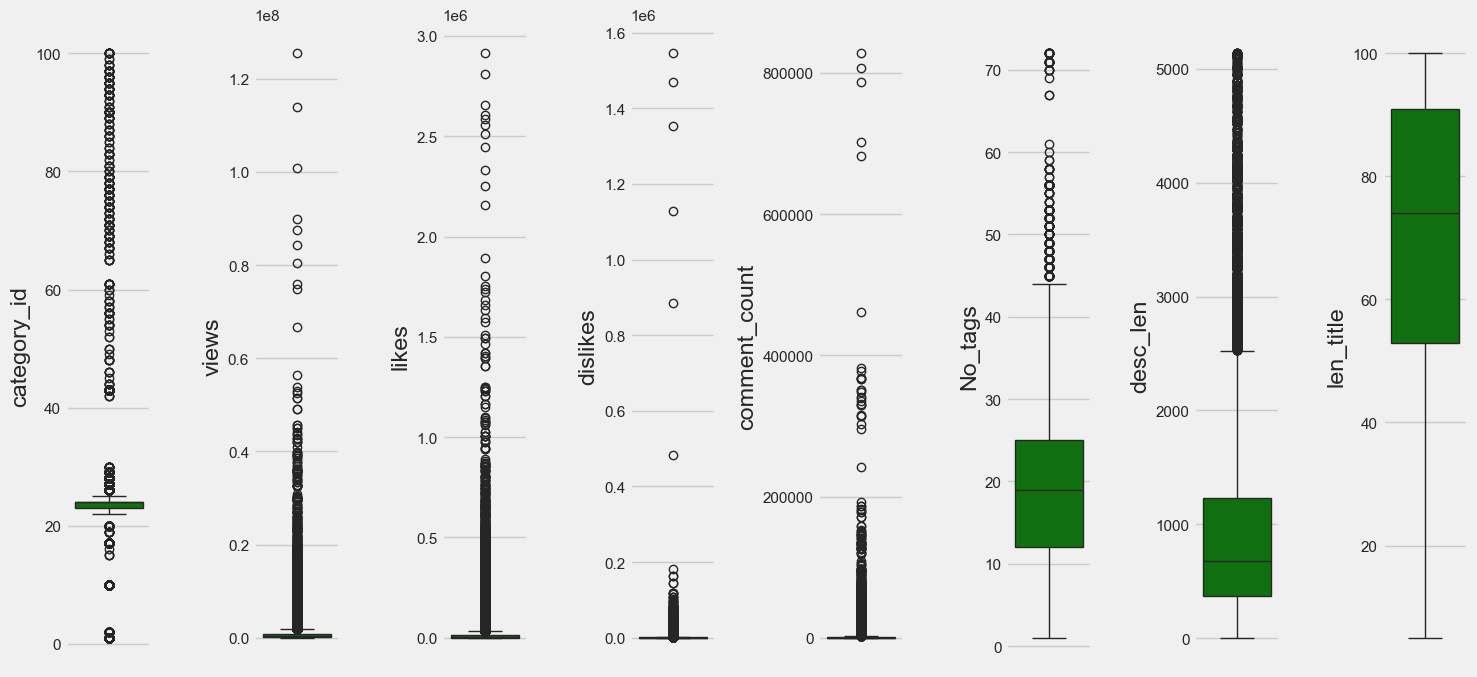

In [15]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# IT CAN BE SEEN THAT THERE ARE MANY OUTLIERS ABOVE. WE NEED LOGARITHMIC TRANSFORMS

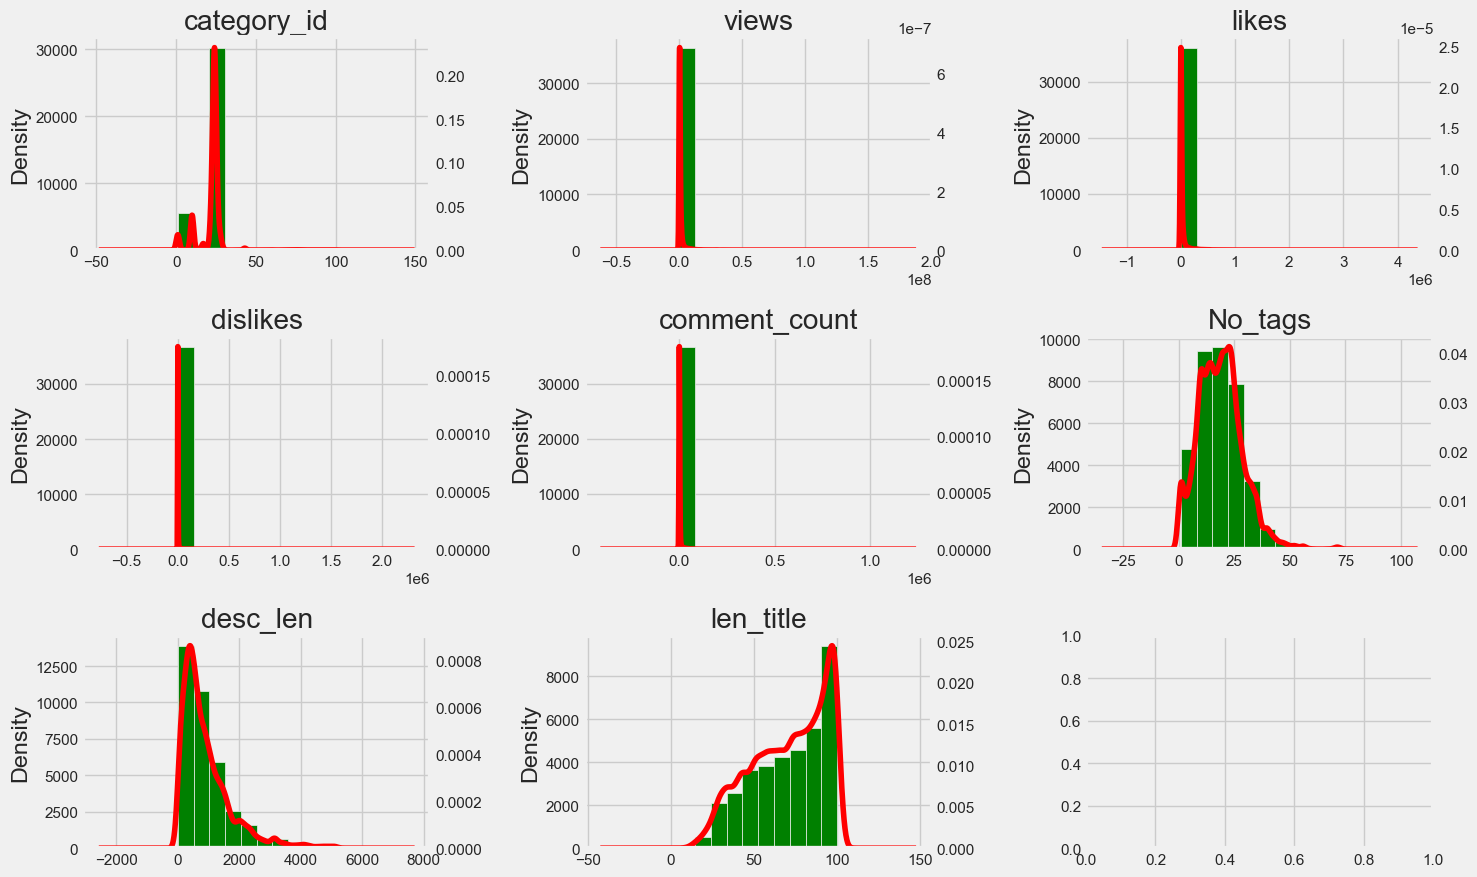

In [18]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()

In [ ]:
# In the data distribution of numerical features, it can be seen that there are several features that are positively skewed 
# and len_title feature that is negatively skewed.

In [19]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)

<Axes: >

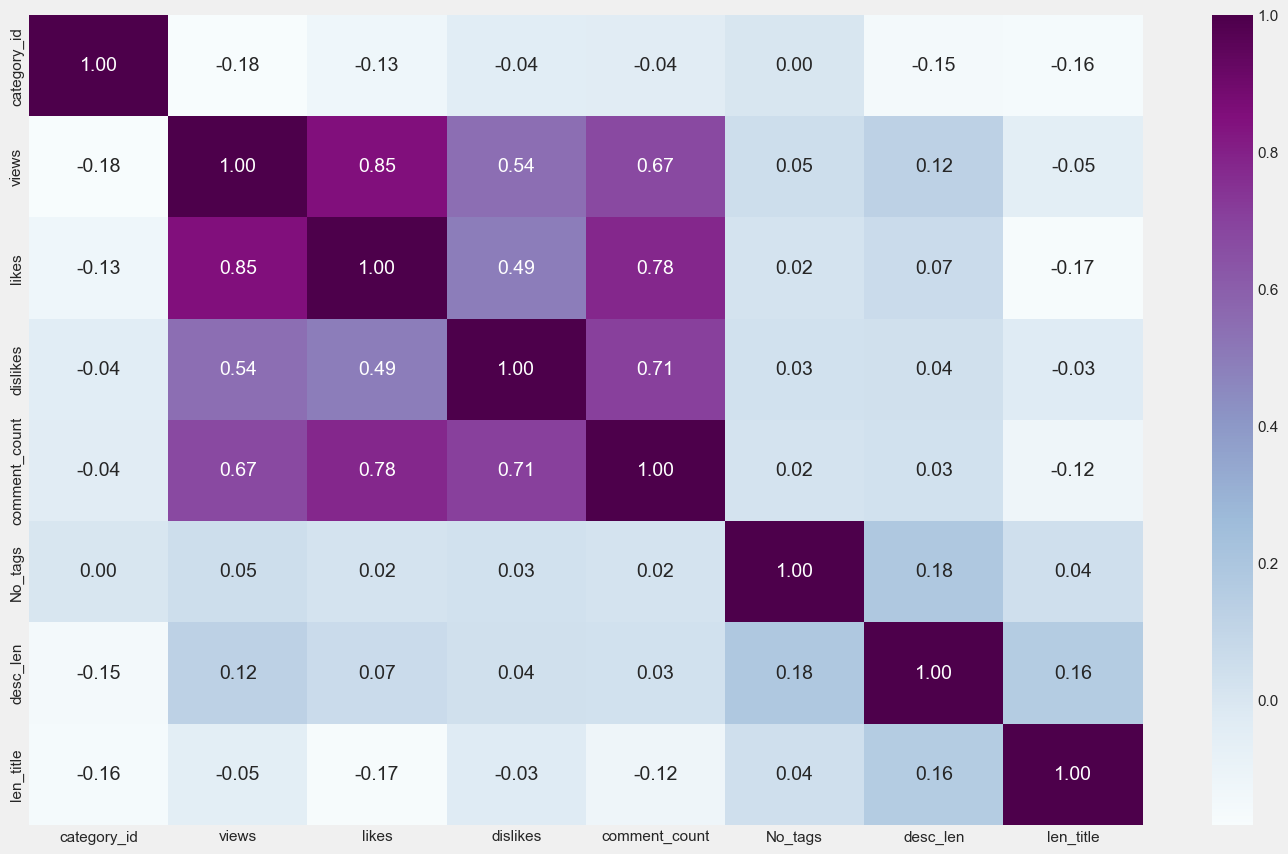

In [20]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [21]:
# There are 3 features that have a strong positive correlation to views, namely the likes, dislikes, and comment_count features

In [33]:
#drop category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['publish_date','description','title','channel_title','tags','publish_time'], axis=1)

In [34]:
# REPLACING MISSING VALUES WITH MODE

In [35]:
data_clean['comments_disabled'].value_counts()
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])
data_clean['comments_disabled'].value_counts()
data_clean['video_error_or_removed'].value_counts()
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])
data_clean['video_error_or_removed'].value_counts()
data_clean['ratings_disabled'].value_counts()
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])
data_clean['ratings_disabled'].value_counts()

ratings_disabled
False    37167
True       757
Name: count, dtype: int64

In [36]:
# REPLACING MISSING VALUES WITH MEDIAN

In [41]:
#fill in the missing value with median
# Fill NaNs in only numeric columns with their median
data_clean.fillna(data_clean.select_dtypes(include='number').median(), inplace=True)
data_clean.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title
0,17.14.11,1.0,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,920.0,81.0
1,17.14.11,25.0,590101.0,735.0,904.0,0.0,True,False,False,19.0,2232.0,58.0
2,17.14.11,24.0,473988.0,2011.0,243.0,149.0,False,False,False,14.0,482.0,58.0


In [42]:
data_clean.isnull().sum()

trending_date             0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
No_tags                   0
desc_len                  0
len_title                 0
dtype: int64

In [43]:
data_clean = data_clean.drop_duplicates()

In [46]:
# LOG TRANSFORM FOR OUTLIERS
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [47]:
# NORMALIZATION
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [48]:
data_clean.describe()


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,32857.000000,3.285700e+04,3.285700e+04,3.285700e+04,32857.000000,32857.000000,32857.000000,32857.000000
mean,21.860760,1.000813e+06,2.574948e+04,1.585416e+03,2541.689990,18.876039,908.471437,71.001978
std,7.534112,3.157975e+06,9.678774e+04,1.695483e+04,14820.416336,9.755309,801.275343,22.125862
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.152630e+05,8.090000e+02,1.000000e+02,75.000000,12.000000,370.000000,54.000000
50%,24.000000,2.825740e+05,2.878000e+03,2.990000e+02,313.000000,19.000000,677.000000,74.000000
75%,24.000000,7.323740e+05,1.209900e+04,9.340000e+02,1174.000000,24.000000,1202.000000,91.000000
max,100.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [49]:
df_pre.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,17.14.11,1.0,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,...,6.825460,4.406719,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,17.14.11,25.0,590101.0,735.0,904.0,0.0,True,False,False,19.0,...,7.711101,4.077537,0.242424,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,17.14.11,24.0,473988.0,2011.0,243.0,149.0,False,False,False,14.0,...,6.180017,4.077537,0.232323,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,17.14.11,23.0,1242680.0,70353.0,1624.0,2684.0,False,False,False,20.0,...,5.575949,3.433987,0.222222,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,17.14.11,24.0,464015.0,492.0,293.0,66.0,False,False,False,11.0,...,6.625392,4.488636,0.232323,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


In [50]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] 
y = df_pre['std_views']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_regression(model, y_pred, xtrain, ytrain, xtest, ytest):
    print("Training R2 score:", model.score(xtrain, ytrain))
    print("Testing R2 score:", model.score(xtest, ytest))
    print("Mean Absolute Error:", mean_absolute_error(ytest, y_pred))
    print("Mean Squared Error:", mean_squared_error(ytest, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(ytest, y_pred)))

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

Training R2 score: 0.9937183175352017
Testing R2 score: 0.9627878650559226
Mean Absolute Error: 0.0018403181250917931
Mean Squared Error: 2.8845672275938588e-05
Root Mean Squared Error: 0.0053708167233614094


Text(0.5, 1.0, 'feature importance score')

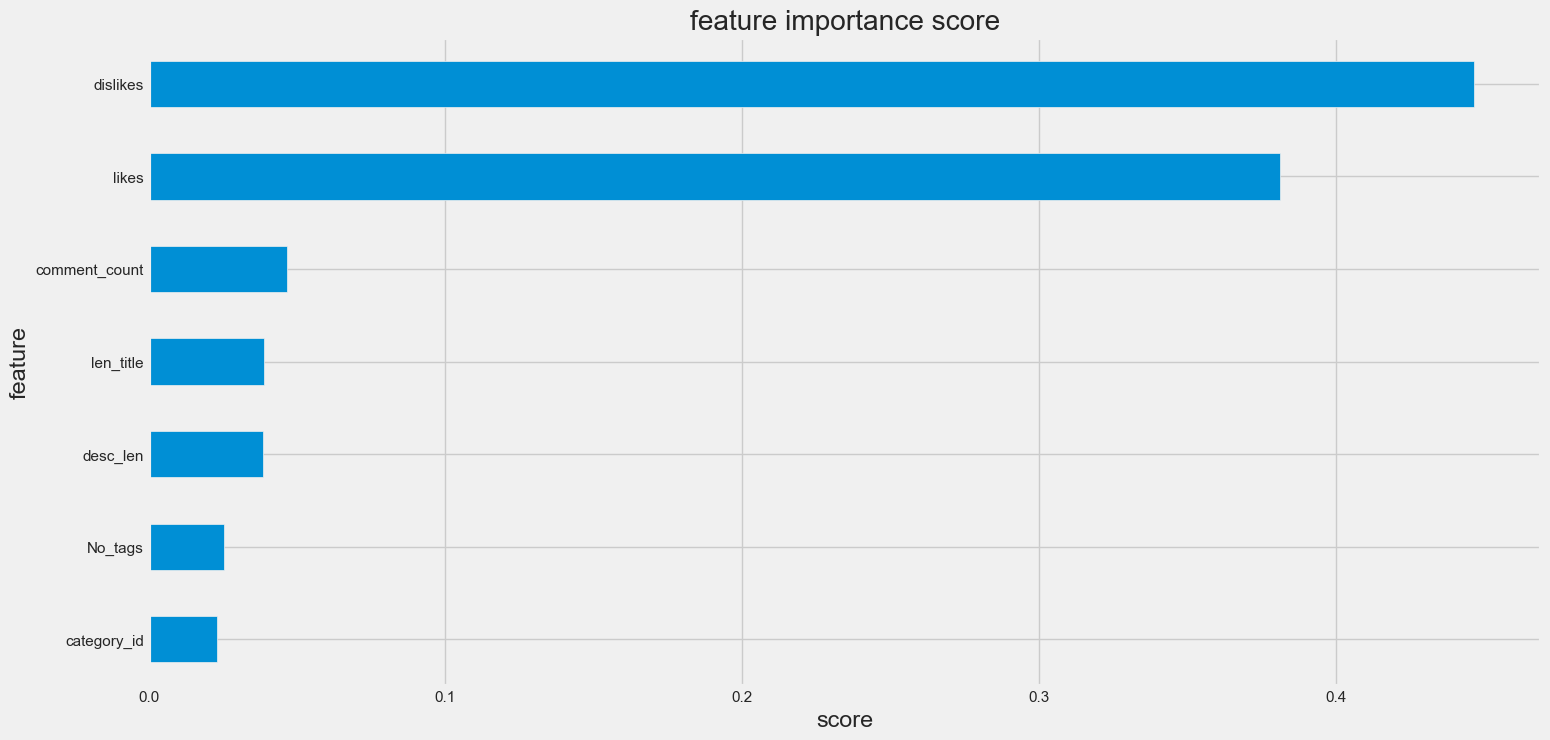

In [56]:
X=data[['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')